In [1]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/src/'
sys.path.insert(0, src_dir)
verbose = True
run_mode = 'debug'
from GRB_population import GRBPopulation
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
import observational_constraints as obs

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('presentation')


In [3]:
paths_to_dir, paths_to_files = io.generate_paths()

In [4]:
config, params, instruments, samples, obs_constraints = io.read_init_files(paths_to_files)
config['Nb_GRBs'] = '1e5'
config['samples'] = ['Stern', 'EpGBM', 'eBAT6']
config['output_dir'] = 'debugger'
paths_to_dir['output'] = paths_to_dir['output']/config['output_dir']

In [5]:
print(paths_to_dir['output'])

/Users/palmerio/Science_projects/GRB_population_model/model_outputs/debugger


In [6]:
cosmo = init_cosmology(paths_to_dir['cosmo'])
ECLAIRs_prop = init_ECLAIRs(ECLAIRs_dir=paths_to_dir['ECLAIRs'],
                            ECLAIRs_config=instruments['ECLAIRs'])
samples['ECLAIRs']['pflx_min'] = ECLAIRs_prop['bkg_total']

Nb_GRBs = int(float(config['Nb_GRBs']))

incl_samples, incl_instruments, incl_constraints = msc.create_config(config=config,
                                                       samples=samples,
                                                       instruments=instruments,
                                                       obs_constraints=obs_constraints)


|                                   SUMMARY                                    |
|                              Nb_GRBs = 1.00e+05                               |
|                     Output directory = debugger                               |
|                                  Properties                                  |
 prop         |    median    |    stdev     |     min      |     max      
--------------------------------------------------------------------------------
 z            |  2.3600e+00  |  1.3926e+00  |  4.5000e-02  |  1.7527e+01        
 L            |  7.5562e+50  |  2.1687e+52  |  5.5859e+49  |  1.0649e+54        
 Ep           |  6.8783e+02  |  1.6656e+03  |  8.9126e+00  |  7.5467e+04        
 t90obs       |  2.8080e+01  |  7.3250e+01  |  3.0249e-01  |  2.7430e+03        
 Cvar         |  2.7550e-01  |  2.2256e-01  |  1.5395e-02  |  1.0000e+00        
 alpha        |  6.5002e-01  |  3.3173e-01  | -7.0564e-01  |  1.7264e+00        
 beta         |  2.4989e+00  | 

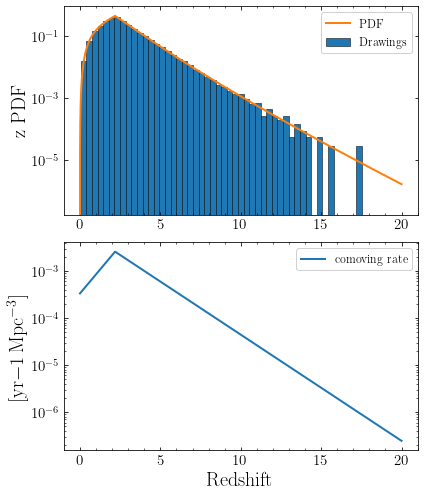

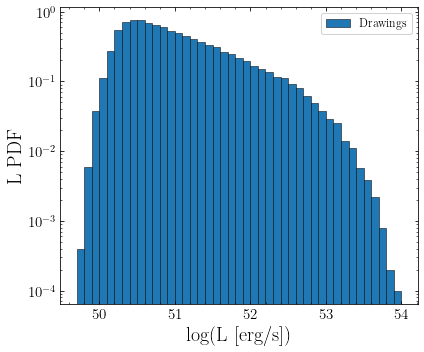

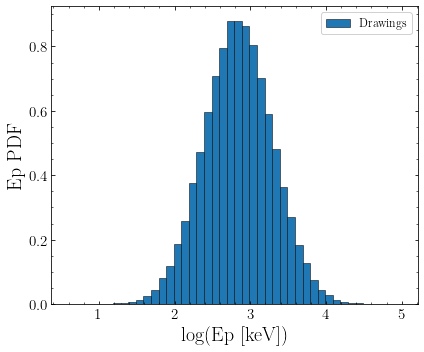

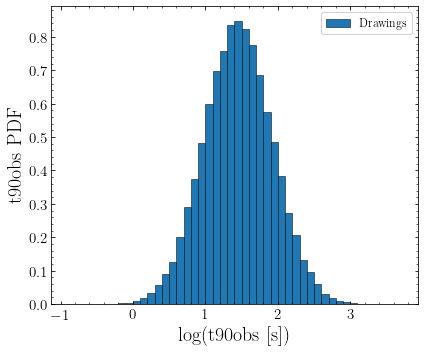

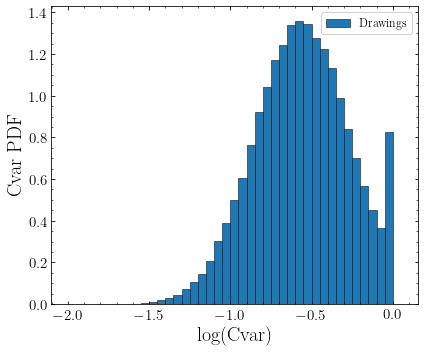

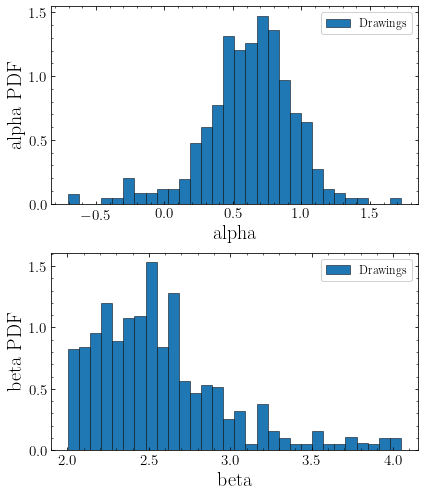

In [7]:
np.random.seed(1)
GRB_pop = GRBPopulation(Nb_GRBs, output_dir=paths_to_dir['output'])
GRB_prop = GRB_pop.draw_GRB_properties(cosmo=cosmo, params=params, run_mode='debug')

ph.calc_peak_photon_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
# ph.calc_peak_energy_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
# ph.calc_photon_fluence(GRB_prop, incl_instruments)
# ph.calc_energy_fluence(GRB_prop, incl_instruments)
ph.calc_det_prob(GRB_prop, incl_samples, **ECLAIRs_prop)

In [8]:
df = GRB_prop
df

,z,L,Ep,t90obs,Cvar,alpha,beta,ktild,D_L,Epobs,Eiso,t90,pht_pflx_BATSE,pht_pflx_BAT,pdet_Stern,pdet_EpGBM,pdet_eBAT6
0,2.170,3.614029e+50,1359.520128,25.821308,0.479307,1.012670,2.65807,0.761872,17401.053714,428.870703,1.410991e+51,8.145523,0.014806,0.022984,0.0,0.0,0.0
1,3.079,1.363275e+51,836.523242,121.940365,0.280789,0.176253,2.17617,0.899757,26674.280384,205.080471,1.144346e+52,29.894671,0.015260,0.018465,0.0,0.0,0.0
2,0.102,7.374763e+49,1990.981125,15.174783,0.239627,0.319481,2.27888,1.098333,464.577272,1806.697936,2.433461e+50,13.770221,0.284493,0.216177,1.0,0.0,0.0
3,1.897,3.543551e+50,2152.396189,2.737327,1.000000,0.378895,2.42775,1.363447,14739.898648,742.974176,3.348243e+50,0.944883,0.006835,0.006049,0.0,0.0,0.0
4,1.403,1.831243e+51,800.897126,34.018301,0.538571,0.587377,2.17368,0.571662,10129.311984,333.290523,1.396200e+52,14.156596,0.105318,0.129350,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.305,1.012078e+51,510.985438,25.666723,0.487083,0.209035,2.13546,0.697563,29057.256652,118.695804,2.939100e+51,5.962073,0.010373,0.017125,0.0,0.0,0.0
99996,3.107,4.635448e+50,1534.558289,26.141224,0.356680,0.419314,3.14171,1.998409,26968.073361,373.644580,1.052379e+51,6.365041,0.009260,0.009905,0.0,0.0,0.0
99997,3.615,7.944843e+50,2214.639660,5.080693,0.611088,0.745270,2.56481,1.019001,32366.378595,479.878583,5.344913e+50,1.100909,0.007395,0.009233,0.0,0.0,0.0
99998,2.541,1.664388e+52,1079.630387,23.279246,0.242428,0.844365,2.27888,0.604210,21117.997938,304.894207,2.652656e+52,6.574201,0.359494,0.533222,1.0,0.0,0.0


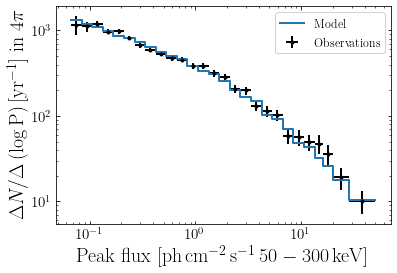

In [10]:
norm_Stern, mod_Stern = obs.compare_to_Stern(df[df['pdet_Stern']==1]['pht_pflx_BATSE'],
                         Stern_file=paths_to_dir['obs']/'Stern.txt',
                         Nb_GRBs=Nb_GRBs, show_plot=True)

11.182229722721516

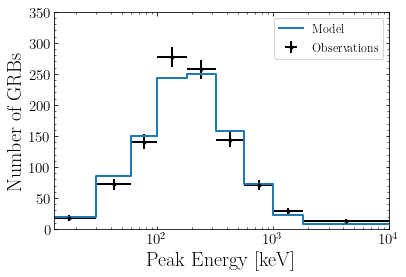

In [11]:
obs.compare_to_EpGBM(df[df['pdet_EpGBM']==1]['Epobs'],
                         GBM_file=paths_to_dir['obs']/'EpGBM.txt',
                        show_plot=True)


10.12684598265296

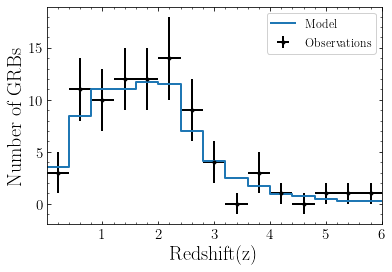

In [12]:
obs.compare_to_eBAT6(df[df['pdet_eBAT6']==1]['z'],
                     eBAT6_file=paths_to_dir['obs']/'eBAT6.txt',
                     show_plot=True)


In [ ]:
f90_dir = paths_to_dir['output'].parent/'191205_best_k1_LN_nF'


(array([  4.,   7.,   8.,   8.,  13.,  12.,  21.,  32.,  36.,  46.,  60.,
         87., 113., 136., 204., 224., 289., 340., 405., 485., 443., 386.,
        299., 244., 155.,  96.,  55.,  22.,   3.,   2.]),
 array([49.76253637, 49.90469525, 50.04685414, 50.18901302, 50.3311719 ,
        50.47333078, 50.61548966, 50.75764855, 50.89980743, 51.04196631,
        51.18412519, 51.32628407, 51.46844295, 51.61060184, 51.75276072,
        51.8949196 , 52.03707848, 52.17923736, 52.32139624, 52.46355513,
        52.60571401, 52.74787289, 52.89003177, 53.03219065, 53.17434953,
        53.31650842, 53.4586673 , 53.60082618, 53.74298506, 53.88514394,
        54.02730283]),
 <a list of 30 Patch objects>)

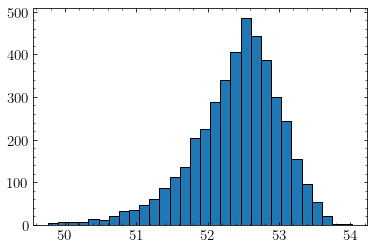

In [16]:
plt.hist(np.log10(df[df['pdet_eBAT6']==1]['L']), bins=30)

In [17]:
import plotting_functions as pf

(<Figure size 648x504 with 4 Axes>,
 {'center': <matplotlib.axes._axes.Axes at 0x7fabd0a1e9b0>,
  'left': <matplotlib.axes._axes.Axes at 0x7fac20eaf860>,
  'top': <matplotlib.axes._axes.Axes at 0x7fac20ec9c88>,
  'cb': <matplotlib.axes._axes.Axes at 0x7fabd0497080>})

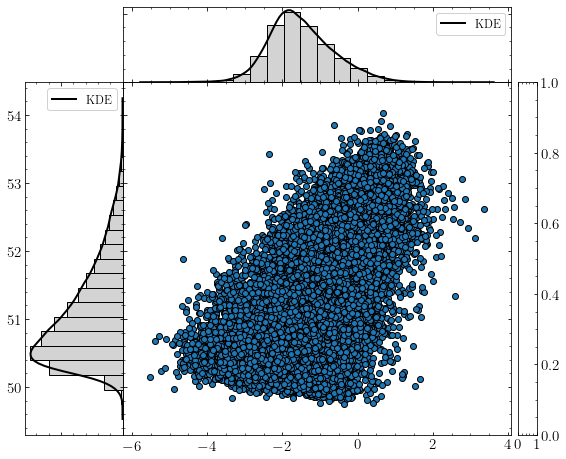

In [19]:
pf.cool_hist2d(np.log10(df['pht_pflx_BATSE'].to_numpy()),
               np.log10(df['L'].to_numpy()),)

In [ ]:
obs_constraints

In [43]:
df = pd.read_csv('../catalogs/Swift_cat/Swift_cat_complete.txt', header=2, sep='|')
df['bat_peakfluxp'] = pd.to_numeric(df['bat_peakfluxp'], errors='coerce')
# df['bat_peakfluxp'].dropna(inplace=True)

In [52]:
cond = df['bat_peakfluxp'] >= 2.6
df[cond]['bat_peakfluxp'].count()/df['bat_peakfluxp'].count()

0.2543103448275862

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper')
pf_dir = '/Users/palmerio/Dropbox/Plotting_GUI/Src/'
sys.path.insert(0, pf_dir)
import plotting_functions as pf

best corr : 0.00020244465099768038


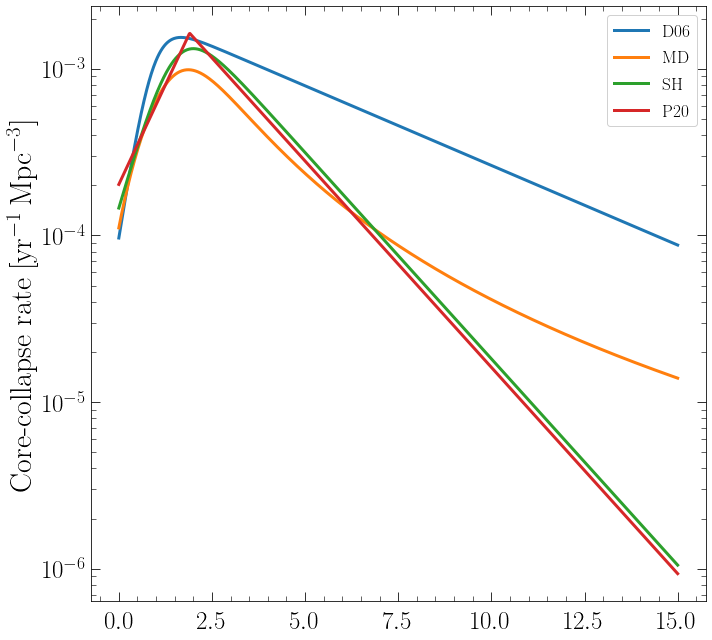

In [93]:
# Adjusting the collapse rate
z = np.linspace(0,15, 1000)
D06 = pf.Daigne_SFR(z, IMF_norm=0.007422)
MD = pf.MD_SFR(z)
SH = pf.SH(z)
P20 = pf.GRBrate_exp(z, norm=1)

corr = np.logspace(-5,0, 1000)
lsq = np.zeros(len(corr))
for i,corr_i in enumerate(corr):
    lsq[i] = np.sum((pf.GRBrate_exp(z, norm=corr_i)-SH)**2)
best_corr = corr[np.argmin(lsq)]
print('best corr : {}'.format(best_corr))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(z, D06, label='D06')
ax.plot(z, MD, label='MD')
ax.plot(z, SH, label='SH')
ax.plot(z, P20*best_corr, label='P20')
ax.legend()
ax.set_yscale('log')
ax.set_ylabel(r'Core-collapse rate [$\rm yr^{-1}\,Mpc^{-3}$]')
plt.show()

3.697579228278583

best corr : 0.02744343303228364


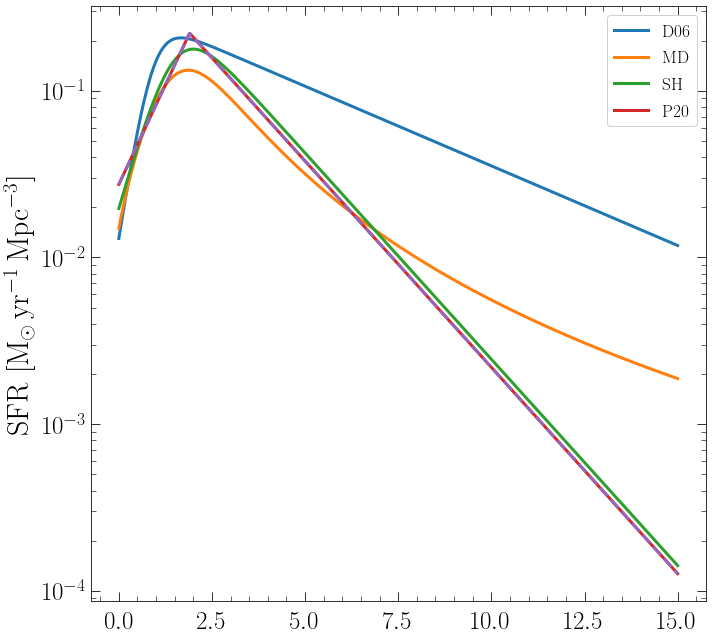

In [107]:
# Adjusting the SFR
z = np.linspace(0,15, 1000)
D06 = pf.Daigne_SFR(z, IMF_norm=1)
MD = pf.MD_SFR(z, IMF_norm=1)
SH = pf.SH(z, IMF_norm=1)
P20 = pf.GRBrate_exp(z, norm=1)

corr = np.logspace(-3,0, 1000)
lsq = np.zeros(len(corr))
for i,corr_i in enumerate(corr):
    lsq[i] = np.sum((pf.GRBrate_exp(z, norm=corr_i)-SH)**2)
best_corr = corr[np.argmin(lsq)]
print('best corr : {}'.format(best_corr))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(z, D06, label='D06')
ax.plot(z, MD, label='MD')
ax.plot(z, SH, label='SH')
ax.plot(z, P20*best_corr, label='P20')
ax.plot(z, pf.GRBrate_exp(z, norm=0.02744343303228364), ls='--')
ax.legend()
ax.set_yscale('log')
ax.set_ylabel(r'SFR [$\rm M_{\odot}\,yr^{-1}\,Mpc^{-3}$]')
plt.show()

In [44]:
0.02807216203941177/135.

0.0002079419410326798

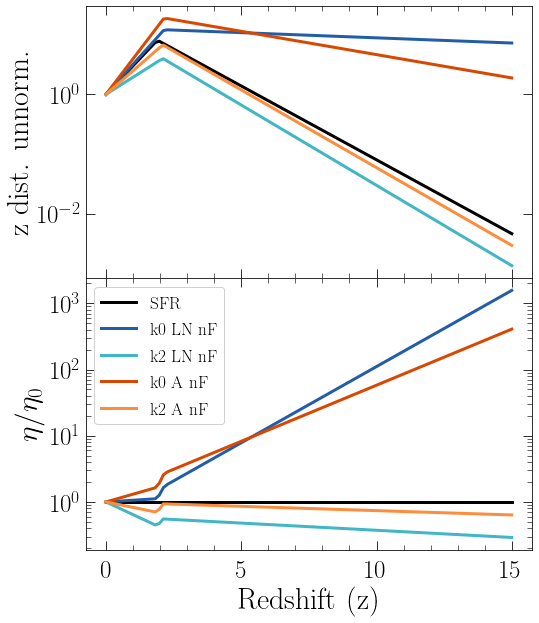

In [57]:
plt.style.use('paper')
colors = ['#225ea8', '#41b6c4', '#d94801', '#fd8d3c']
SFR = pf.GRBrate_exp(z,norm=1)
k0_A_nF = pf.GRBrate_exp(z, a=1.37, b=-0.18, zm=2.15, norm=1)
k2_A_nF = pf.GRBrate_exp(z, a=0.91, b=-0.6, zm=2.1, norm=1)
k0_LN_nF = pf.GRBrate_exp(z, a=1.16, b=-0.04, zm=2.15, norm=1)
k2_LN_nF = pf.GRBrate_exp(z, a=0.66, b=-0.62, zm=2.1, norm=1)

fig, axes = plt.subplots(2, figsize=(8,10), sharex=True, tight_layout=False)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(z, SFR, label='SFR', color='k')
ax1.plot(z, k0_LN_nF, label='k0_LN_nF', color=colors[0])
ax1.plot(z, k2_LN_nF, label='k2_LN_nF', color=colors[1])
ax1.plot(z, k0_A_nF, label='k0_A_nF', color=colors[2])
ax1.plot(z, k2_A_nF, label='k2_A_nF', color=colors[3])
ax1.set_yscale('log')
ax1.set_ylabel('z dist. unnorm.')

ax2.plot(z, SFR/SFR, label='SFR', color='k')
ax2.plot(z, k0_LN_nF/SFR, label='k0 LN nF', color=colors[0])
ax2.plot(z, k2_LN_nF/SFR, label='k2 LN nF', color=colors[1])
ax2.plot(z, k0_A_nF/SFR, label='k0 A nF', color=colors[2])
ax2.plot(z, k2_A_nF/SFR, label='k2 A nF', color=colors[3])
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('$\eta/\eta_0$')

fig.subplots_adjust(hspace=0)

In [112]:
x1=49.5;y1=1
x2=54.5;y2=3.7
a = (y2-y1)/(x2-x1)
b = y2 - a*x2
print(a,b)

0.54 -25.730000000000004
